<a href="https://colab.research.google.com/github/RamKumarMygapula/DeepLearning/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [28]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


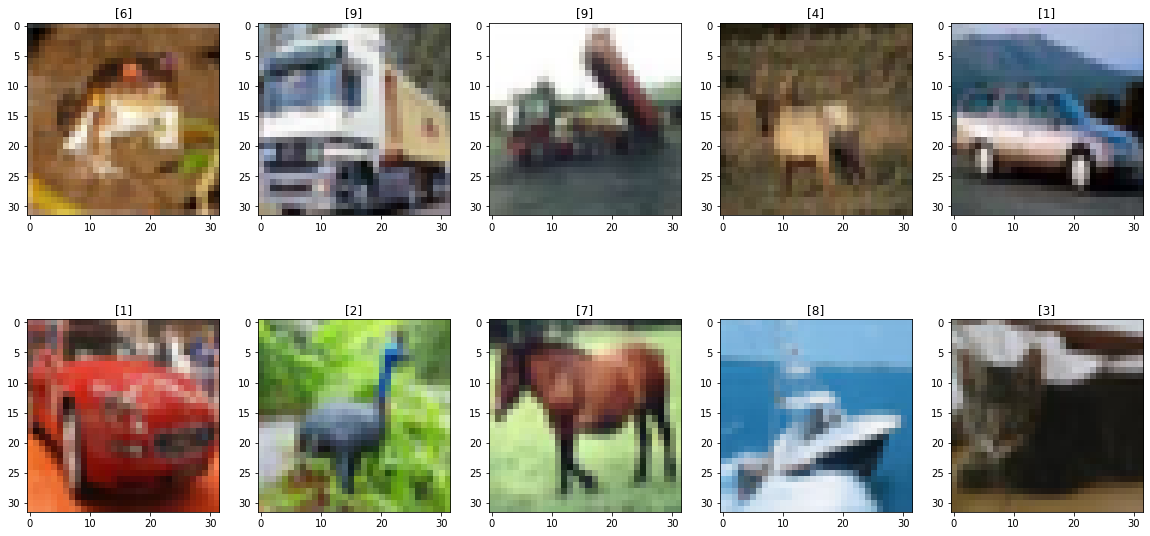

In [29]:

plt.figure(figsize=[20, 10])
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])
  plt.title(train_labels[i])

In [30]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [31]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [32]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()

In [33]:
print(train_ds)

<TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>


In [34]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [35]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')     
])

In [38]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,validation_data=test_ds,epochs=10)

Epoch 1/10
1562/1562 [==============================] - 527s 333ms/step - loss: 1.6306 - accuracy: 0.4207 - val_loss: 1.3431 - val_accuracy: 0.5244
Epoch 2/10
1562/1562 [==============================] - 536s 340ms/step - loss: 1.2655 - accuracy: 0.5661 - val_loss: 1.1013 - val_accuracy: 0.6228
Epoch 3/10
1562/1562 [==============================] - 523s 332ms/step - loss: 1.0765 - accuracy: 0.6419 - val_loss: 1.0568 - val_accuracy: 0.6476
Epoch 4/10
1562/1562 [==============================] - 527s 334ms/step - loss: 0.9565 - accuracy: 0.6864 - val_loss: 0.9584 - val_accuracy: 0.6874
Epoch 5/10
1562/1562 [==============================] - 529s 336ms/step - loss: 0.8390 - accuracy: 0.7232 - val_loss: 0.9701 - val_accuracy: 0.6763
Epoch 6/10
1562/1562 [==============================] - 530s 336ms/step - loss: 0.7407 - accuracy: 0.7559 - val_loss: 0.8466 - val_accuracy: 0.7196
Epoch 7/10
1562/1562 [==============================] - 524s 333ms/step - loss: 0.6579 - accuracy: 0.7842 - val_